In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz

In [2]:
wine = datasets.load_wine()
print('Dataset structure= ', dir(wine))

Dataset structure=  ['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [3]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target
df['feature_names'] = df.target.apply(lambda x : wine.target_names[x]) 

In [4]:
print('Unique target values=',df['target'].unique())

Unique target values= [0 1 2]


In [5]:
df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,feature_names
91,12.00,1.51,2.42,22.0,86.0,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450.0,1,class_1
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,0,class_0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,class_0
118,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0,1,class_1
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1,class_1


In [6]:
# label = class 0
df[df.target == 0].head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,feature_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0


In [7]:
# label = class 1
df[df.target == 1].head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,feature_names
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1,class_1
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1,class_1
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1,class_1


In [8]:
# label = class 2 
df[df.target == 2].head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,feature_names
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.1,0.76,1.29,630.0,2,class_2
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.4,0.74,1.42,530.0,2,class_2
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.7,0.66,1.36,560.0,2,class_2


In [9]:
X = df[['alcohol','malic_acid']]
y = df[['target']]

In [10]:
print('X shape=', X.shape)

X shape= (178, 2)


In [13]:
print('Y shape=', y.shape)

Y shape= (178, 1)


In [11]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)

In [12]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (142, 2)
X_test dimension=  (36, 2)
y_train dimension=  (142, 1)
y_train dimension=  (36, 1)


In [14]:
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(X_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [15]:
print('Actual value for 10th training example=',wine.target_names[y_test.iloc[10]][0])
print('Predicted value for 10th training example=', wine.target_names[cls.predict([X_test.iloc[10]])][0])

Actual value for 10th training example= class_0
Predicted value for 10th training example= class_0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
print('\nActual value of species for 20th training example=',wine.target_names[y_test.iloc[20]][0])
print('Predicted value of species for 20th training example=', wine.target_names[cls.predict([X_test.iloc[20]])][0])


Actual value of species for 20th training example= class_0
Predicted value of species for 20th training example= class_0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [17]:
print('\nActual value of species for 30th training example=',wine.target_names[y_test.iloc[29]][0])
print('Predicted value of species for 30th training example=', wine.target_names[cls.predict([X_test.iloc[29]])][0])


Actual value of species for 30th training example= class_2
Predicted value of species for 30th training example= class_0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [18]:
cls.score(X_test, y_test)

0.7222222222222222

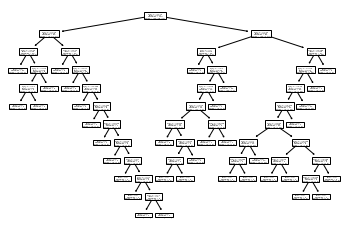

In [19]:
tree.plot_tree(cls);

In [20]:
dot_data = tree.export_graphviz(cls, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("wine_decision_tree")

'wine_decision_tree.pdf'

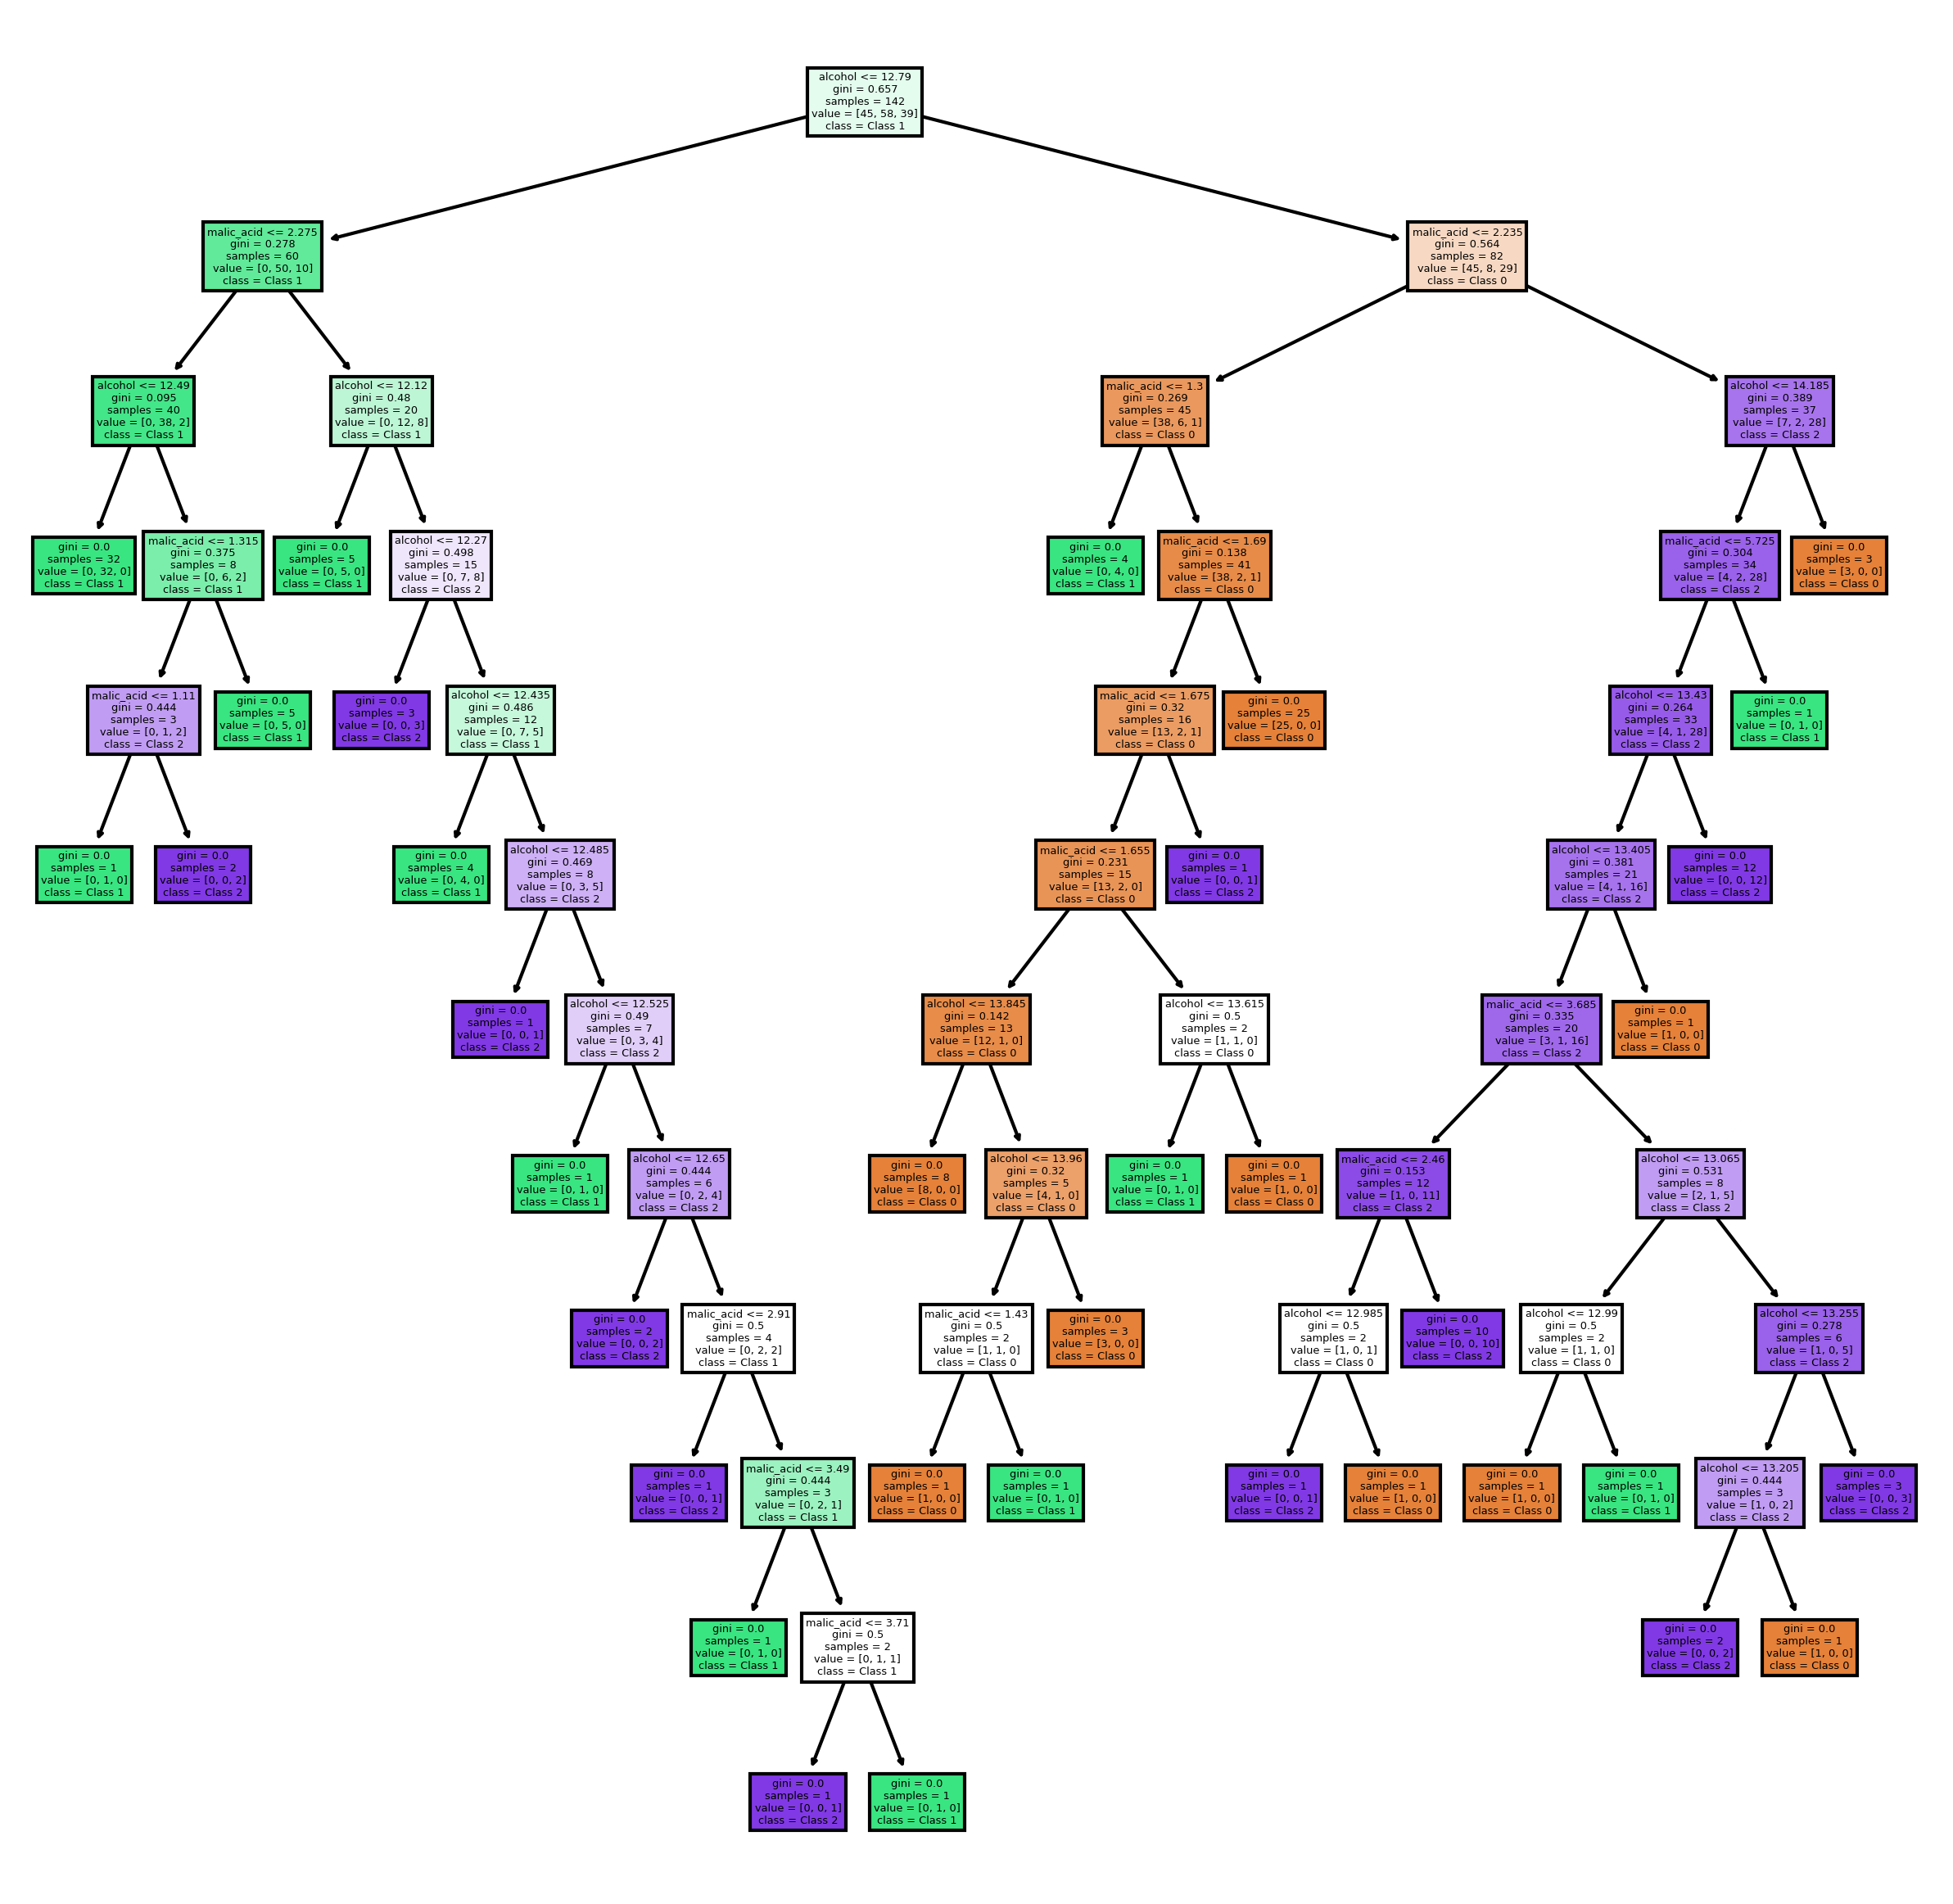

In [21]:
import matplotlib.pyplot as plt

fn=['alcohol','malic_acid']
cn=['Class 0', 'Class 1', 'Class 2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(cls,feature_names = fn,class_names=cn,filled = True);
fig.savefig('imagename.png')

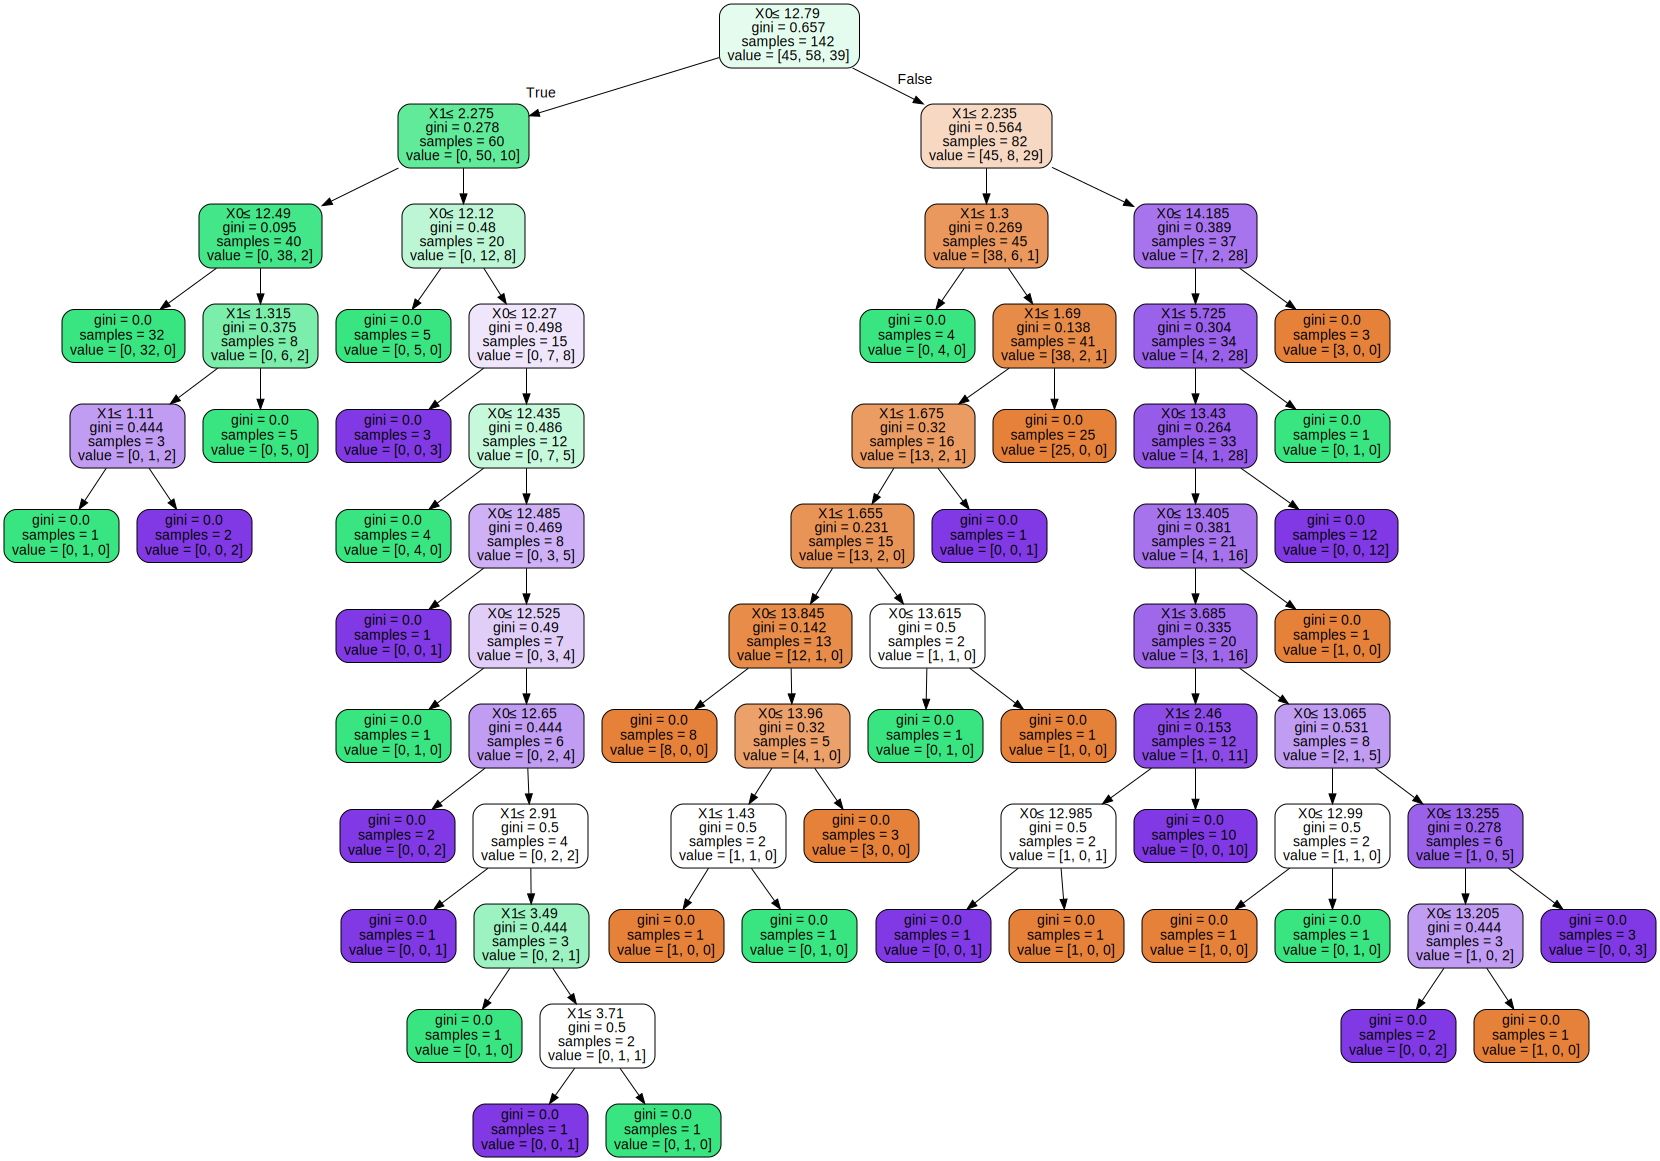

In [22]:
dot_data = tree.export_graphviz(cls, out_file=None,filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)   
graph

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

classifier=DecisionTreeClassifier()
classifier=classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print('Accuracy : ',metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.6666666666666666


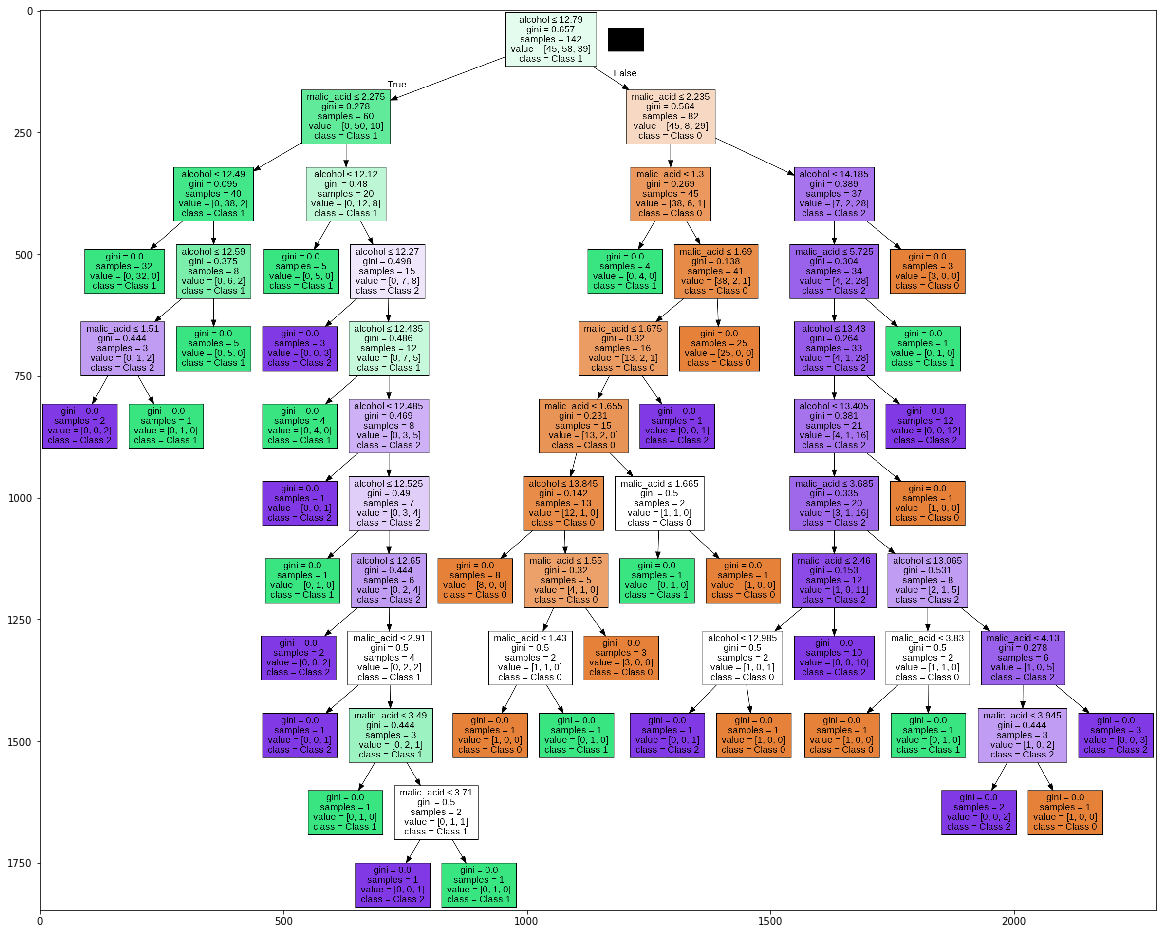

In [37]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

dot_data=StringIO()
filename='winetree.png'
fn=['alcohol','malic_acid']
cn=['Class 0', 'Class 1', 'Class 2']
out=tree.export_graphviz(classifier,feature_names=fn,class_names=cn,out_file=dot_data,filled=True,special_characters=True,rotate=False)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img=mpimg.imread(filename)
plt.figure(figsize=(20,30))
plt.imshow(img,interpolation='nearest')

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

classifier1=DecisionTreeClassifier(criterion='entropy', max_depth=3)
classifier1=classifier1.fit(X_train,y_train)
y_pred=classifier1.predict(X_test)
print('Accuracy : ',metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.8055555555555556


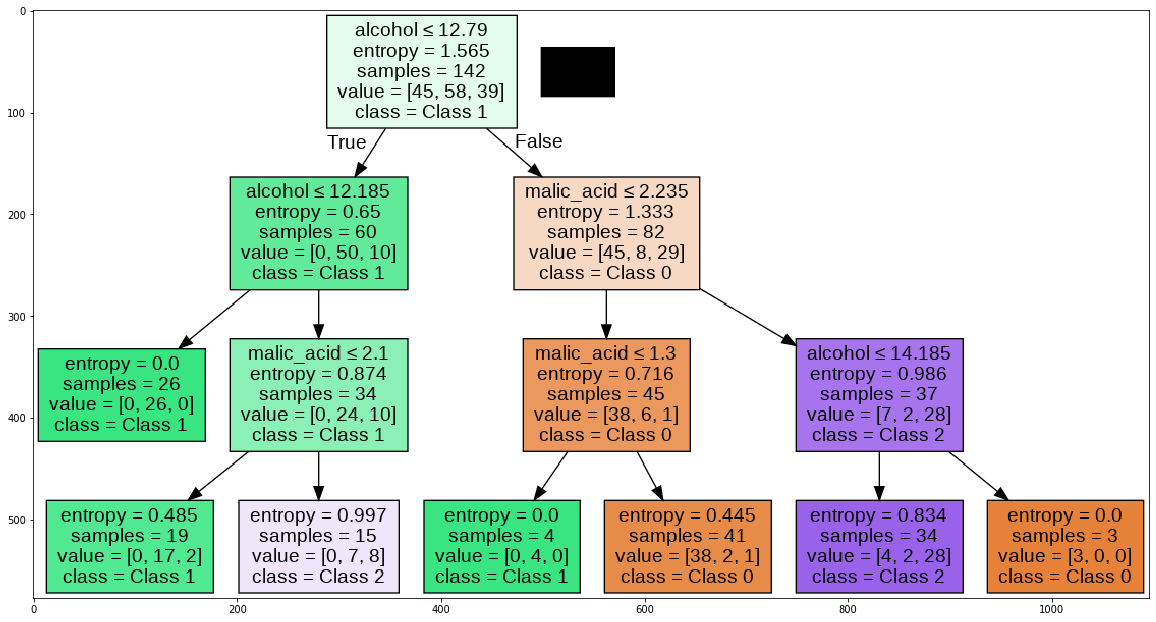

In [40]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

dot_data=StringIO()
filename='winetree.png'
fn=['alcohol','malic_acid']
cn=['Class 0', 'Class 1', 'Class 2']
out=tree.export_graphviz(classifier1,feature_names=fn,class_names=cn,out_file=dot_data,filled=True,special_characters=True,rotate=False)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img=mpimg.imread(filename)
plt.figure(figsize=(20,30))
plt.imshow(img,interpolation='nearest')